___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [129]:
df = pd.read_csv('kyphosis.csv')

In [130]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

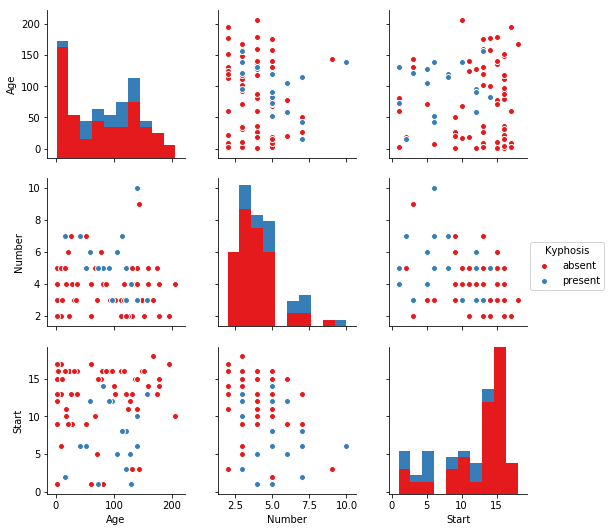

In [131]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dtree = DecisionTreeClassifier()

In [137]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [138]:
predictions = dtree.predict(X_test)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.88      0.71      0.79        21
    present       0.25      0.50      0.33         4

avg / total       0.78      0.68      0.72        25



In [141]:
print(confusion_matrix(y_test,predictions))

[[15  6]
 [ 2  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [142]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

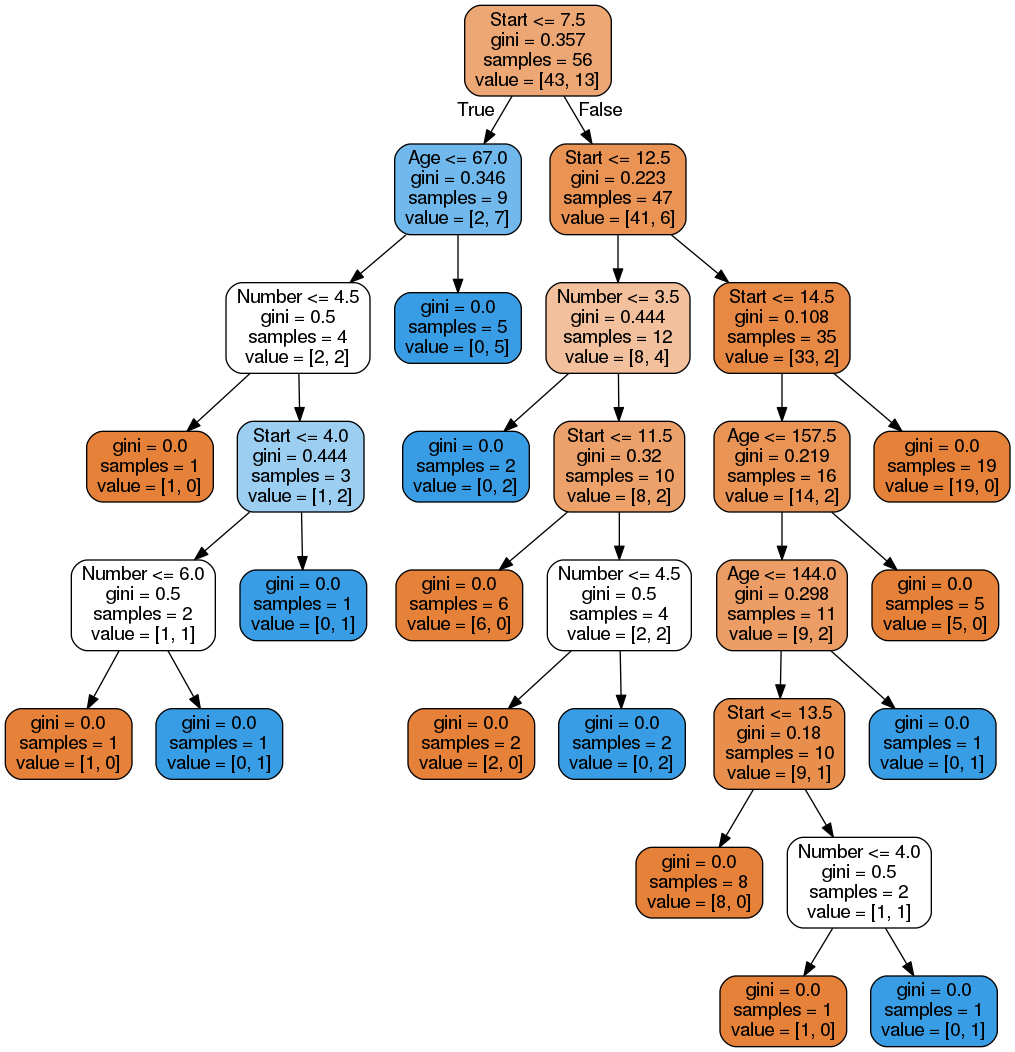

In [143]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [145]:
rfc_pred = rfc.predict(X_test)

In [146]:
print(confusion_matrix(y_test,rfc_pred))

[[17  4]
 [ 1  3]]


In [147]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.94      0.81      0.87        21
    present       0.43      0.75      0.55         4

avg / total       0.86      0.80      0.82        25



# Great Job!

In [148]:
df = pd.read_csv('USA_Housing.csv')

In [149]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [150]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [151]:
df.columns = ['Income', 'House Age', 'Number of Rooms','Number of Bedrooms', 'Population', 'Price', 'Address']

In [152]:
df.columns

Index(['Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Population', 'Price', 'Address'],
      dtype='object')

In [153]:
df.head()

,Income,House Age,Number of Rooms,Number of Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [154]:
df = df.drop(['Address'],axis=1)

In [155]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [158]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [159]:
from pprint import pprint

In [160]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [163]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [164]:
rf.predict(X_test)

array([1233103.96270734, 1122711.11535591, 1332972.24864605,
       1204664.94793938, 1153657.36711229, 1545244.61757958,
       1049701.68392261,  768493.16160735,  893196.01901177,
       1447261.35395938,  595202.42041039, 1331366.66831531,
       1008540.35545978, 1763953.60284065, 1188534.54650279,
       1075423.66892706, 1438008.41220378, 1136447.07812834,
        768700.48332552,  860379.8202094 , 1144599.86122988,
        969801.99046576, 1501367.56881634, 1379125.67294615,
       1550898.36025398, 1103188.5000471 , 1092175.55117998,
       1053898.09329535,  876502.24531616, 1678717.623961  ,
       1331375.84390467, 1681976.51455567, 1388388.52775719,
       1253539.47317591, 1474520.37124716, 1746392.81751203,
       1465197.07543619,  813736.55296035, 1784183.11616982,
       1160253.69950462, 1571709.96298193,  964887.22896849,
       1409307.23292596,  809911.03031573, 1179303.19776402,
       1011956.6609899 , 1311240.95204721, 1312450.7511493 ,
       1488021.21957917,

In [165]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [166]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 102395.3983 degrees.
Accuracy = 90.44%.


In [170]:
base_model.feature_importances_

array([0.43974937, 0.22922683, 0.12232394, 0.01815629, 0.19054358])

In [172]:
#Feature importance

# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X_train.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])


In [173]:
#see df
print(df)

   importance             feature
0    0.440307              Income
1    0.231884           House Age
2    0.190327          Population
3    0.122146     Number of Rooms
4    0.015335  Number of Bedrooms


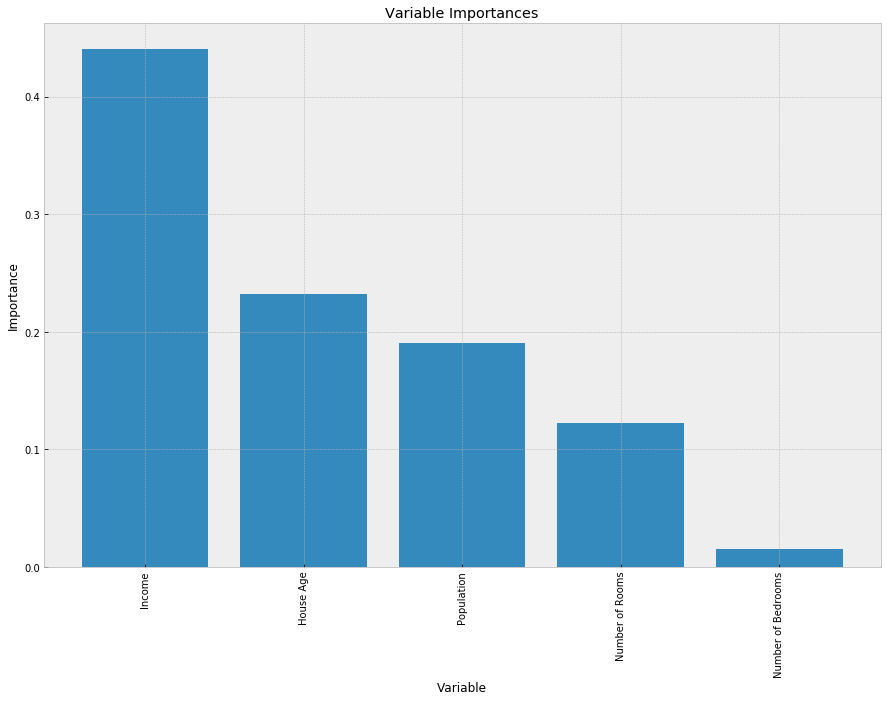

In [174]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Random Search with Cross Validation

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [95]:
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [97]:
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

## Create Random Grid

In [98]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [100]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_features=sqrt, max_depth=30, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1 
[CV] max_features=sqrt, max_depth=30, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=30, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1, total=   2.8s
[CV] max_features=sqrt, max_depth=30, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=30, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1, total=   2.8s
[CV] max_features=sqrt, max_depth=10, bootstrap=True, min_samples_split=5, n_estimators=2000, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=30, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1, total=   2.5s
[CV] max_features=sqrt, max_depth=10, bootstrap=True, min_samples_split=5, n_estimators=2000, min_sa

[CV] max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=5, n_estimators=800, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=5, n_estimators=800, min_samples_leaf=1, total=   6.7s
[CV] max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=5, n_estimators=800, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=5, n_estimators=800, min_samples_leaf=1, total=   6.9s
[CV] max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=10, n_estimators=2000, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=5, n_estimators=800, min_samples_leaf=1, total=   6.9s
[CV] max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=10, n_estimators=2000, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=10, n_estimators=2000, min_samples_leaf=1, total=  13.5s
[CV] max_features=sqrt

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.3min


[CV]  max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=10, n_estimators=2000, min_samples_leaf=1, total=  13.5s
[CV] max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=5, n_estimators=1600, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=10, n_estimators=2000, min_samples_leaf=1, total=  13.6s
[CV] max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=5, n_estimators=1600, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=5, n_estimators=1600, min_samples_leaf=2, total=  11.5s
[CV] max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=5, n_estimators=1600, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=10, bootstrap=False, min_samples_split=5, n_estimators=1600, min_samples_leaf=2, total=  11.0s
[CV] max_features=sqrt, max_depth=30, bootstrap=False, min_samples_split=10, n_estimators=800, min_samples_leaf=2 
[CV]  max_features

[CV] max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=5, n_estimators=1400, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=5, n_estimators=1400, min_samples_leaf=1, total=  15.3s
[CV] max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=5, n_estimators=1400, min_samples_leaf=1 
[CV]  max_features=auto, max_depth=None, bootstrap=True, min_samples_split=2, n_estimators=1800, min_samples_leaf=2, total=  23.4s
[CV] max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=5, n_estimators=1400, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=5, n_estimators=1400, min_samples_leaf=1, total=  12.5s
[CV] max_features=sqrt, max_depth=None, bootstrap=False, min_samples_split=2, n_estimators=400, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=None, bootstrap=False, min_samples_split=2, n_estimators=400, min_samples_leaf=1, total=   3.7s
[CV] max_features

[CV]  max_features=sqrt, max_depth=20, bootstrap=False, min_samples_split=10, n_estimators=800, min_samples_leaf=2, total=   5.8s
[CV] max_features=sqrt, max_depth=20, bootstrap=False, min_samples_split=10, n_estimators=800, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=90, bootstrap=True, min_samples_split=2, n_estimators=1800, min_samples_leaf=4, total=   9.4s
[CV] max_features=sqrt, max_depth=20, bootstrap=False, min_samples_split=10, n_estimators=800, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=20, bootstrap=False, min_samples_split=10, n_estimators=800, min_samples_leaf=2, total=   5.9s
[CV] max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=5, n_estimators=1200, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=20, bootstrap=False, min_samples_split=10, n_estimators=800, min_samples_leaf=2, total=   5.8s
[CV] max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=5, n_estimators=1200, min_samples_leaf=2 
[CV]  max_features=sqrt

[CV]  max_features=auto, max_depth=90, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2, total=  23.8s
[CV] max_features=auto, max_depth=90, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2 
[CV]  max_features=auto, max_depth=90, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2, total=  24.9s
[CV] max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=4 
[CV]  max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=4, total=   3.7s
[CV] max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=4 
[CV]  max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=4, total=   3.2s
[CV] max_features=sqrt, max_depth=80, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=4 
[CV]  max_features=sqrt

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.6min


[CV]  max_features=auto, max_depth=50, bootstrap=False, min_samples_split=10, n_estimators=1000, min_samples_leaf=4, total=  14.6s
[CV] max_features=auto, max_depth=30, bootstrap=False, min_samples_split=5, n_estimators=1000, min_samples_leaf=4 
[CV]  max_features=auto, max_depth=30, bootstrap=False, min_samples_split=5, n_estimators=1000, min_samples_leaf=4, total=  14.4s
[CV] max_features=auto, max_depth=30, bootstrap=False, min_samples_split=5, n_estimators=1000, min_samples_leaf=4 
[CV]  max_features=auto, max_depth=30, bootstrap=False, min_samples_split=5, n_estimators=1000, min_samples_leaf=4, total=  17.3s
[CV] max_features=sqrt, max_depth=None, bootstrap=False, min_samples_split=5, n_estimators=1400, min_samples_leaf=2 
[CV]  max_features=auto, max_depth=30, bootstrap=False, min_samples_split=5, n_estimators=1000, min_samples_leaf=4, total=  17.3s
[CV] max_features=sqrt, max_depth=None, bootstrap=False, min_samples_split=5, n_estimators=1400, min_samples_leaf=2 
[CV]  max_featu

[CV] max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1, total=  10.0s
[CV] max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1, total=   9.5s
[CV] max_features=auto, max_depth=None, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1, total=   9.2s
[CV] max_features=auto, max_depth=None, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=2 
[CV]  max_features=auto, max_depth=None, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=2, total=  15.8s
[CV] max_featu

[CV]  max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=2, total=   3.1s
[CV] max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=90, bootstrap=False, min_samples_split=10, n_estimators=400, min_samples_leaf=2, total=   3.2s
[CV] max_features=sqrt, max_depth=None, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1 
[CV]  max_features=auto, max_depth=90, bootstrap=True, min_samples_split=5, n_estimators=1600, min_samples_leaf=1, total=  17.4s
[CV] max_features=sqrt, max_depth=None, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=None, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1, total=   8.3s
[CV] max_features=sqrt, max_depth=None, bootstrap=True, min_samples_split=10, n_estimators=1600, min_samples_leaf=1 
[CV]  max_fea

[CV] max_features=sqrt, max_depth=100, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1 
[CV]  max_features=sqrt, max_depth=100, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1, total=   2.9s
[CV] max_features=sqrt, max_depth=80, bootstrap=True, min_samples_split=2, n_estimators=1600, min_samples_leaf=4 
[CV]  max_features=sqrt, max_depth=100, bootstrap=True, min_samples_split=5, n_estimators=400, min_samples_leaf=1, total=   3.3s
[CV] max_features=sqrt, max_depth=80, bootstrap=True, min_samples_split=2, n_estimators=1600, min_samples_leaf=4 
[CV]  max_features=sqrt, max_depth=80, bootstrap=True, min_samples_split=2, n_estimators=1600, min_samples_leaf=4, total=  10.0s
[CV] max_features=sqrt, max_depth=80, bootstrap=True, min_samples_split=2, n_estimators=1600, min_samples_leaf=4 
[CV]  max_features=sqrt, max_depth=80, bootstrap=True, min_samples_split=2, n_estimators=1600, min_samples_leaf=4, total=   9.6s
[CV] max_features=sqrt, max_

[CV] max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2 
[CV]  max_features=auto, max_depth=10, bootstrap=False, min_samples_split=2, n_estimators=1000, min_samples_leaf=1, total=  15.4s
[CV] max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2, total=  12.2s
[CV] max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2, total=  12.2s
[CV] max_features=auto, max_depth=40, bootstrap=True, min_samples_split=10, n_estimators=2000, min_samples_leaf=2 
[CV]  max_features=sqrt, max_depth=20, bootstrap=True, min_samples_split=2, n_estimators=2000, min_samples_leaf=2, total=  13.9s
[CV] max_features=auto, ma

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [107]:
rf_random.cv_results_

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda

{'mean_fit_time': array([ 2.51182373, 12.52333196,  9.38876891, 35.2917676 ,  9.36886652,
         5.85108813,  8.04149381,  5.76352819, 27.48372595, 25.6506199 ,
         3.50836166,  6.5455188 , 13.02708244, 10.63386059,  5.47767456,
        25.41597899,  9.11606431,  6.60082452, 25.00629552,  6.32653109,
        12.78871234, 12.69535979,  8.22838863, 24.5221409 , 12.63740206,
         3.78587993, 33.59263603,  5.85667181, 27.63905994,  6.66035334,
         7.83951648,  6.18788656,  6.19941266,  4.14048902,  9.05462138,
         5.63065163,  6.82751751,  9.5829196 ,  8.44026383,  5.4931945 ,
         1.8089788 ,  2.91401291,  3.77000427,  2.13978259,  2.81143745,
         6.53851438, 23.16397953,  3.07503255,  7.76955438,  4.64361254,
        39.87360549, 30.34969616, 14.69764694, 16.05304289, 11.73673868,
         4.42022562, 20.43346985, 25.16966621, 19.52314568,  7.58405542,
         1.19453907,  2.49335043, 18.93099276, 18.41930652,  9.13533711,
        15.5482765 , 25.07039976, 

In [108]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [102]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [104]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 102395.3983 degrees.
Accuracy = 90.44%.


In [105]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 93898.8286 degrees.
Accuracy = 91.19%.


In [106]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.82%.


# Grid Search with Cross Validation

In [113]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [114]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200 
[CV]  max_fe

[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000, total=   5.5s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.5s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.5s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.6s


[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.5s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200, total=   1.0s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000, total=   5.2s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200, total=   0.9s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_sa

[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100, total=   0.7s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200, total=   1.0s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200, total=   1.0s
[CV] max_features=2, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samp

[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.6s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.8s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.7s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200, total=   1.2s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=2, max_depth=80, bootstrap=True, min_samp

[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000, total=   7.0s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.7s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.6s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.6s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_sa

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min


[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200, total=   1.3s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200, total=   1.4s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=1000, total=   6.7s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200, total=   1.9s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=3, max_depth=80, bootstrap=True, 

[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=100, total=   0.9s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=200, total=   1.6s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=200, total=   1.6s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=80, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=1000, total=   7.8s
[CV] max_features=3, max_depth=80, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=300 
[CV]  max_features=3, max_depth=80, bootstrap=True, 

[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100, total=   0.7s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=200, total=   1.1s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=1000, total=   5.5s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=2, max_depth=90, bootstrap=True, 

[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=100, total=   0.7s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200, total=   1.7s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=2, max_depth=90, bootstrap=True, 

[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=1000, total=   5.3s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=100 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=100 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=100, total=   0.7s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=100 
[CV]  max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=2, max_depth=90, bootstrap=True, 

[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=1000, total=   6.9s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=1000, total=   6.9s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100, total=   0.8s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100, total=   0.7s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=3, max_depth=90, bootstrap=True, 

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.1min


[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.7s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200, total=   1.3s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000, total=   6.5s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=200, total=   1.3s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_sa

[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100, total=   0.6s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100, total=   0.6s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200, total=   1.2s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200, total=   1.2s
[CV] max_features=3, max_depth=90, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=90, bootstrap=True, min_samp

[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200, total=   1.0s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=2, max_depth=100, bootstrap=True,

[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000, total=   5.9s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=4, n_estimators=100, total=   0.6s
[CV] max_features=2, max_depth=100, bootstrap=Tr

[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300, total=   1.4s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=1000 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=1000, total=   6.1s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=1000 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=1000, total=   6.1s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100, total=   0.7s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=8, min_samples_leaf=5, n_estimators=100 
[CV]  max_features=2, max_depth=100, bootst

[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300, total=   1.9s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300, total=   1.8s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000, total=   7.0s
[CV] max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000 
[CV]  max_features=2, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000, total=   7.4s
[CV] max_features=3, max_depth=100, boo

[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=200, total=   2.0s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300, total=   2.2s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300, total=   2.1s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300, total=   1.9s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=3, max_depth=100, boots

[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=200 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=4, n_estimators=1000, total=   6.7s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=200, total=   1.3s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300, total=   1.8s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300, total=   2.0s
[CV] max_features=3, max_depth=100, bootstr

[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=200, total=   1.2s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=200, total=   1.2s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=200, total=   1.2s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=1000, total=   6.0s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300 
[CV]  max_features=3, max_depth=100, bootst

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 14.8min


[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300, total=   1.9s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000, total=   7.0s
[CV] max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000 
[CV]  max_features=3, max_depth=100, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=1000, total=   7.1s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100, total=   0.7s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=8, min_samples_leaf=3, n_estimators=100 
[CV]  max_features=2, max_depth=110, bootst

[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300, total=   2.0s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300, total=   2.3s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000, total=   7.5s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=1000, total=   7.3s
[CV] max_features=2, max_depth=110, boo

[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=200, total=   1.0s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300, total=   1.5s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300, total=   1.5s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=1000 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=300, total=   1.5s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=4, n_estimators=1000 
[CV]  max_features=2, max_depth=110, boots

[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=200 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=200, total=   1.2s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=10, min_samples_leaf=5, n_estimators=1000, total=   5.2s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300, total=   2.0s
[CV] max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300 
[CV]  max_features=2, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=5, n_estimators=300, total=   2.0s
[CV] max_features=2, max_depth=110, bootstr

[CV]  max_features=3, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=200, total=   1.4s
[CV] max_features=3, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=3, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=200, total=   1.2s
[CV] max_features=3, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=200 
[CV]  max_features=3, max_depth=110, bootstrap=True, min_samples_split=10, min_samples_leaf=3, n_estimators=1000, total=   7.0s
[CV] max_features=3, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300 
[CV]  max_features=3, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=200, total=   1.3s
[CV] max_features=3, max_depth=110, bootstrap=True, min_samples_split=12, min_samples_leaf=3, n_estimators=300 
[CV]  max_features=3, max_depth=110, bootst

In [119]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [120]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [122]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 94137.7733 degrees.
Accuracy = 91.15%.


In [123]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.78%.
